## Import Library

In [40]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
scrapreview = pd.read_csv('/content/drive/MyDrive/ulasan_game_HOK.csv')

In [43]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

# Membuat dataframe dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [44]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,502b77c5-d19b-45d2-b07f-f5925b6e235f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pernah mengalami jaringan tiba tiba hilang pad...,5,125,10.5.1.2,2025-07-10 02:46:12,NaN,NaN,10.5.1.2
1,5bad4dfb-daa2-4530-b5ba-4bd43e46149f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dari segi grafik ok enak dilihat game play dal...,3,6,10.5.1.2,2025-07-10 20:08:27,Terima kasih atas perhatian dan masukan Anda t...,2025-07-11 03:39:21,10.5.1.2
2,d31df0ec-1917-4260-bbd7-7bf1305823b6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"so far so good, tiap event pasti akan dapat sk...",4,5,10.5.1.2,2025-07-10 12:46:45,NaN,NaN,10.5.1.2
3,57661801-2efe-4637-b6d8-24c5d5004972,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk kelas game moba ini cukup bagus tapi moh...,5,39,10.5.1.2,2025-07-10 10:00:24,NaN,NaN,10.5.1.2
4,efa31903-0305-431e-83a3-3e35e0aa8f47,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"saya mau mengkritik"",ini game sebenarnya bagus...",1,243,10.5.1.2,2025-07-10 06:05:12,"Kami sangat memahami perasaan Anda. Saat ini, ...",2025-07-10 06:56:17,10.5.1.2


In [45]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99000 entries, 0 to 98999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              99000 non-null  object
 1   userName              99000 non-null  object
 2   userImage             99000 non-null  object
 3   content               98999 non-null  object
 4   score                 99000 non-null  int64 
 5   thumbsUpCount         99000 non-null  int64 
 6   reviewCreatedVersion  70400 non-null  object
 7   at                    99000 non-null  object
 8   replyContent          24345 non-null  object
 9   repliedAt             24345 non-null  object
 10  appVersion            70400 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.3+ MB


In [46]:
clean_df = app_reviews_df.dropna()

In [47]:
clean_df = clean_df.drop_duplicates()

jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [48]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15835 entries, 1 to 98995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15835 non-null  object
 1   userName              15835 non-null  object
 2   userImage             15835 non-null  object
 3   content               15835 non-null  object
 4   score                 15835 non-null  int64 
 5   thumbsUpCount         15835 non-null  int64 
 6   reviewCreatedVersion  15835 non-null  object
 7   at                    15835 non-null  object
 8   replyContent          15835 non-null  object
 9   repliedAt             15835 non-null  object
 10  appVersion            15835 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.4+ MB


## Preproscessing Text

In [49]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
  text = re.sub(r'@[A-Z-z0-9]+', '', text) # Menghapus Mention
  text = re.sub(r'#[A-Z-z0-9]+', '', text) # Menghapus Hashtag
  text = re.sub(r'RT[\s]', '', text) # Menghapus RT
  text = re.sub(r'http\S+', '', text) # Menghapus Link
  text = re.sub(r'[0-9]+', '', text) # Menghapus Angka
  text = re.sub(r'[^\w\s]', '', text) # Menghapus karakter lain selain huruf dan angka

  text = text.replace('\n', ' ' ) # Mengganti baris baru dengan spasi
  text = text.translate(str.maketrans('','', string.punctuation)) # Menghapus semua tanda baca
  text = text.strip(' ') # Menghapus karakter spasi dari kiri dan kanan teks
  return text


def casefoldingText(text): # Mengubah karakter dalam teks menjadi huruf kecil
  text = text.lower()
  return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
  text = word_tokenize(text)
  return text

def filteringText(text): # Menghapus stopwords dalam text
  listStopwords = set(stopwords.words('indonesian'))
  listStopwords1 = set(stopwords.words('english'))
  listStopwords.update(listStopwords1)
  listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
  filtered = []
  for txt in text:
    if txt not in listStopwords:
      filtered.append(txt)
  text = filtered
  return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran
  # Membuat Objek Stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  # Memecah teks menjadi daftar kata
  words = text.split()

  # Menerapkan stemming pada setiap kata dalam daftar
  stemmed_words = [stemmer.stem(word) for word in words]

  # Menggabungkan kata-kata yang telah distem
  stemmed_text = ' '.join(stemmed_words)

  return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
  sentence = ' '.join(word for word in list_words)
  return sentence

In [50]:
slangwords = { "woww" : "wow", "aminn" : "amin", "met" : "selamat", "netaas" : "menetas", "keberpa" : "keberapa", "eeeehhhh" : "eh", "kata2nyaaa" : "kata-katanya",
"hallo" : "halo", "kaka" : "kakak", "ka" : "kak", "daah" : "dah", "aaaaahhhh" : "ah", "yaa" : "ya", "smga" : "semoga", "slalu" : "selalu", "amiin" : "amin", "kk" : "kakak",
               "trus" : "terus", "kk" : "kakak", "sii" : "sih", "nyenengin" : "menyenangkan", "bgt" : "banget", "gemess" : "gemas", "akuuu" : "aku", "jgn" : "jangan", "yaa" : "ya",
               "udah" : "sudah", "gitu" : "begitu", "aja" : "saja", "gemesiin" : "menggemaskan", "menyenangkn" : "menyenangkan", "rb" : "ribu", "akau" : "aku", "saranin" : "menyarankan",
               "nemuin" : "menemukan", "yah" : "ya", "met" : "selamat", "mnis2nya" : "manis-manisnya", "gtu" : "begitu", "tu" : "itu", "idolaa" : "idola", "bangett" : "banget", "kaakk" : "kak",
               "baaiikkk" : "baik", "telaatt" : "telat", "kaak" : "kak", "yg" : "yang", "lg" : "lagi", "skarang" : "sekarang", "yg" : "yang", "sempet" : "sempat", "karna" : "karena", "ngga" : "tidak",
               "karna" : "karena", "mantep" : "mantap", "loohhh" : "loh", "yeee" : "ya", "baguuuuus" : "bagus", "sampe" : "sampai", "ngikutin" : "mengikuti", "gayany" : "gayanya", "ngikutin" : "mengikuti",
               "lg" : "lagi", "bnk" : "bang", "awaas" : "awas", "siip" : "sip", "abizzzz" : "habis", "kerrrrennnn" : "keren", "sayaa" : "saya", "pengen" : "pengin", "kpan" : "kapan", "bgt" : "banget",
               "sma" : "sama", "sdkit" : "sedikit", "bngt" : "banget", "lgu" : "lagu", "bener2" : "benar-benar", "kharismanya" : "karismanya", "aq" : "aku", "yg" : "yang", "jdi" : "jadi",
               "lgi" : "lagi", "gk" : "tidak", "kek" : "kayak", "lgunya" : "lagunya", "kpan" : "kapan", "kereeeeennnn" : "keren", "nyamain" : "menyamakan", "slalu" : "selalu", "lakik" : "laki",
               "siippp" : "sip", "bkn" : "bukan", "nyangka" : "menyangka", "bangettt" : "banget", "kereeen" : "keren", "wihhhhhh" : "wih", "tp" : "tapi", "inget" : "ingat", "bingitsss" : "banget",
               "dmn" : "dimana", "bird" : "biru", "kaloo" : "kalau", "gimna" : "bagaimana", "tuuh" : "tuh", "nyebur" : "mencebur", "yng" : "yang", "dbuat" : "dibuat", "kn" : "kan", "org" : "orang",
               "pingin" : "pengin", "bgt" : "banget", "tu" : "itu", "bangcat" : "bangsat", "yha" : "ya", "waoohhh" : "wah", "pngn" : "pengin", "tmpt" : "tempat", "dhe" : "deh", "indahhh" : "indah",
               "bgttt" : "banget", "tuhh" : "tuh", "berarto" : "berarti", "ga" : "tidak", "aminn" : "amin", "aamiin" : "amin", "amiiinn" : "amin", "dgn" : "dengan", "aminnnn2" : "amin-amin",
               "amiin" : "amin", "aamiin" : "amin", "amiiiin" : "amin", "amiin" : "amin", "aminnn" : "amin", "amiend" : "amien", "yaaa" : "ya", "ameen" : "amin", "aminnnn" : "amin",
               "amiiinnn" : "amin", "kek" : "kayak", "ngomong" : "mengomong", "inget" : "ingat", "mamer" : "memamerkan", "keles" : "kali", "jelase" : "jelas", "liat" : "lihat",
               "uwakk" : "uwak", "ntar" : "entar", "bs" : "bisa", "gini" : "begini", "jgn" : "jangan", "sampe" : "sampai", "aq" : "aku", "salfok" : "salah fokus", "njir" :
               "anjir", "piiink" : "pink", "astgfrullah" : "astagfirullah", "ko" : "kok", "cd" : "celana dalam", "gbs" : "tidak bisa", "bhs" : "bahasa", "yaaaaaa" : "ya",
               "gak" : "tidak", "bangshad" : "bangsat", "yaa" : "ya", "stagahhhh" : "astaga", "kpn" : "kapan", "iooo" : "lo", "dy" : "dia", "d" : "ada", "mslh" : "masalah",
               "qt" : "kita", "jdi" : "jadi", "plampiasannn" : "pelampiasan", "masalahh" : "masalah", "tohh" : "toh", "inghinn" : "ingin", "dhi" : "di", "mengherthii" : "mengerti",
               "yanckh" : "yang", "chelalyyu" : "selalu", "therchakitty" : "tersakiti", "mauuuuu" : "mau", "kaliii" : "kali", "bangat" : "banget", "bkin" : "bikin", "dongg" : "dong",
               "yokkk" : "yuk", "gini" : "begini", "yu" : "yuk", "sweger" : "segar", "kereeen" : "keren", "gantengg" : "ganteng", "bingiit" : "banget", "gak" : "tidak", "kebukaaa" :
               "terbuka", "tpi" : "tapi", "keliatan" : "kelihatan", "yakk" : "ya", "kayakk" : "kayak", "asliii" : "asli", "kyk" : "kayak", "cntiknya" : "cantiknya", "bat" : "banget",
               "ga" : "tidak", "ngeliatnya" : "melihatnya", "sll" : "selalu", "bet" : "banget", "njerr" : "anjir", "bingiiittttzzzz" : "banget", "bgt" : "banget", "k" : "kak", "klo" : "kalau",
               "lg" : "lagi", "dooong" : "dong", "masi" : "masih", "gni" : "begini", "kek" : "kayak", "gini" : "begini", "aja" : "saja", "udah" : "sudah", "hdk" : "hendak", "yg" : "yang",
               "jugaa" : "juga", "mksud" : "maksud", "aj" : "saja", "tetep" : "tetap", "tp" : "tapi", "mbakx" : "mbaknya", "syantik" : "cantik", "syantik" : "cantik", "kite" : "kita", "pa" : "apa",
               "mksd" : "maksud", "bejilbbnya" : "berjilbabnya", "masio" : "masih", "yahhh" : "ya", "makasih" : "terima kasih", "leh" : "boleh", "ugaaa" : "juga", "yah" : "ya", "jerewi" : "jerawat",
               "ilang" : "hilang", "jilbabnyaah" : "jilbabnya", "kek" : "kayak", "yuuuk" : "yuk", "warnaaa" : "warna", "punyaaa" : "punya", "cantiik" : "cantik", "sukaaak" : "suka", "kebayanyaa" : "kebayanya",
               "mantes" : "memantas", "merekaaaa" : "mereka", "jugaaa" : "juga", "gilaaaa" : "gila", "tiga2nya" : "tiga-tiganya", "lucuu" : "lucu", "emessss" : "gemas", "ucullllll" : "lucu", "jdi" : "jadi",
               "males" : "malas", "bangeettt" : "banget", "gemesshh" : "gemas", "ngomong" : "mengomong", "apaaa" : "apa", "ampuunn" : "ampun", "pengen" : "pengin", "ciuuuummmm" : "cium", "mbil" : "sambil",
               "ngmng" : "mengomong", "ngemeng" : "mengomong", "epe" : "apa", "seehh" : "sih", "yank" : "sayang", "ucul" : "lucu", "yahh" : "ya", "kek" : "kayak", "gw" : "gue", "lucuu" : "lucu",
               "ngakak" : "mengakak", "astagfirrullah" : "astagfirullah", "bkn" : "bukan", "tpi" : "tapi", "suerrr" : "suer", "gk" : "tidak", "mnta" : "minta", "lg" : "lagi", "syg" : "sayang",
               "ntik" : "cantik", "pny" : "punya", "dapet" : "dapat", "kek" : "kayak", "gini" : "begini", "suru" : "suruh", "lucuuuu" : "lucu", "ketawakkkk" : "ketawa", "kyanya" : "kayanya",
               "bnget" : "banget", "nakutin" : "menakutkan", "malingg" : "maling", "cocokk" : "cocok", "niihh" : "nih", "imutttttt" : "imut", "satuuuuu" : "satu", "sesekk" : "sesak",
               "nafass" : "nafas", "bgtt" : "banget", "cintaaaaaaa" : "cinta", "lucuk" : "lucu", "lucuk" : "lucu", "ma" : "sama", "duluu" : "dulu", "megang" : "memegang", "ngakak" : "mengakak",
               "kawinin" : "mengawini", "liatin" : "memperlihatkan", "ny" : "nya", "d" : "di", "bdan" : "badan", "nyaaa" : "nya", "gemesin" : "menggemaskan", "daah" : "dah", "fotoin" : "memfoto",
               "ngaku" : "mengaku", "kaaa" : "kak", "ganteng2" : "ganteng-ganteng", "pcarny" : "pacarnya", "kri" : "kiri", "knpa" : "kenapa", "pda" : "pada", "cmn" : "cuman", "gara2" : "gara-gara",
               "garuk2" : "garuk-garuk", "tembokk" : "tembok", "namax" : "namanya", "kiriii" : "kiri", "kyk" : "kayak", "bungkusin" : "bungkuskan", "atu" : "satu", "dehhhh" : "deh", "dongg" : "dong",
               "kakk" : "kak", "ngegantiin" : "menggantikan", "alloh" : "allah", "smpe" : "sampai", "msh" : "masih", "trsa" : "terasa", "khadirannya" : "kehadirannya", "fikiran" : "pikiran",
               "hayalanku" : "khayalanku", "bru" : "baru", "nton" : "menonton", "jdi" : "jadi", "ngapain" : "mengapai", "yaa" : "ya", "surgaa" : "surga", "kangenn" : "kangen", "kgn" : "kangen",
               "kakkkkk" : "kak", "rinduuuuuuuuu" : "rindu", "ninggalin" : "meninggalkan", "smg" : "semoga", "terangkhn" : "terangkan", "bgtttt" : "banget", "knp" : "kenapa", "tuk" : "untuk",
               "slama" : "selama", "orng" : "orang", "bngunlah" : "bangunlah", "k" : "kak", "bngun" : "bangun", "ea" : "ya", "qu" : "ku", "hiri" : "hari", "kalo" : "kalau",
               "temanny" : "teman-temannya", "gtu" : "begitu", "aza" : "saja", "dr" : "dari", "temanny" : "teman-temannya", "ny" : "nya", "alm" : "almarhum", "skrg" : "sekarang",
               "knpa" : "kenapa", "sie" : "sih", "benet" : "benar", "bangetttt" : "banget", "tuu" : "tuh", "skrang" : "sekarang", "gda" : "tidak ada", "trus" : "terus", "gantiin" : "menggantikan",
               "sma" : "sama", "jdi" : "jadi", "gak" : "tidak", "kta" : "kata", "kklau" : "kalau", "d" : "di", "acra" : "acara", "gk" : "tidak", "sma" : "sama", "kasian" : "kasihan", "bangett" : "banget",
               "yaaa " : "ya", "bnerr" : "benar", "emk" : "emak", "temenn" : "teman", "pngenn" : "pengin", "terkenall" : "terkenal", "ajhh" : "saja", "gk" : "tidak", "sungguh2" : "sungguh-sungguh",
               "mnjadi" : "menjadi", "shbt" : "sahabat", "k" : "kak", "bner" : "benar", "bgt" : "banget", "ktny" : "katanya", "shbt" : "sahabat", "skrg" : "sekarang", "pda" : "pada",
               "dimusiumin" : "dimuseumkan", "ga" : "tidak", "bntu" : "bantu", "pda" : "pada", "dlu" : "dulu", "klo" : "kalau", "gda" : "tidak ada", "pda" : "pada", "udh" : "sudah", "pda" : "pada",
               "kangem" : "kangen", "amiiin" : "amin", "smua" : "semua", "slmt" : "selamat", "jln" : "jalan", "mudhan" : "mudah-mudahan", "tenny" : "tenang", "d" : "di", "sdh" : "sudah", "yg" : "yang",
               "tnya" : "tanya", "blm" : "belum", "td" : "tadi", "sblm" : "sebelum", "yah" : "ya", "bole" : "boleh", "lahhh" : "lah", "tp" : "tapi", "blm" : "belum", "dapet" : "dapat", "maap" : "maaf",
               "gk" : "tidak", "cm" : "cuma", "syg" : "sayang", "kmrn" : "kemarin", "wkt" : "waktu", "d" : "di", "ama" : "sama", "ak" : "aku", "lht" : "lihat", "biasa2" : "biasa-biasa", "mnrtkuu" : "menurutku",
               "trs" : "terus", "ikutin" : "mengikuti", "jdwl" : "jadwal", "yaaa" : "ya", "jgn" : "jangan", "wajiiib" : "wajib", "aaaammmiiiinnnn" : "amin", "dtnggu" : "ditunggu", "yah" : "ya",
               "jan" : "jangan", "kunjungin" : "kunjungi", "lagiiii" : "lagi", "waktunyaaa" : "waktunya", "diluangin" : "diluangkan", "yaa" : "ya", "makasih" : "terima kasih", "jga" : "juga",
               "mimin" : "admin", "istimewaaa" : "istimewa", "blom" : "belum", "sempet" : "sempat", "nangis" : "menangis", "karna" : "karena", "ngaku" : "mengaku-ngaku", "diaa" : "dia", "donkk" : "dong",
               "gak" : "tidak", "kejawab" : "terjawab", "yaaaa" : "ya", "seru2an" : "seru-seruan", "mohom" : "mohon", "kebalas" : "terbalas", "yaaa" : "ya", "ikutin" : "ikuti", "nyempetin" : "menyempatkan",
               "wktunya" : "waktunya", "kaaaa" : "kak", "nyempetin" : "menyempatkan", "ngobrol" : "mengobrol", "bangett" : "banget", "namain" : "menamai", "bls" : "balas", "ijap" : "ijab", "kobul" : "kabul",
               "dgn" : "dengan", "co" : "cowok", "pst" : "pasti", "inggat" : "ingat", "brdua" : "berdua", "masing2" : "masih", "sdh" : "sudah", "pny" : "punya", "brdua" : "berdua", "sanggat" : "sangat",
               "siipp" : "sip", "laa" : "lah", "dlm" : "dalam", "hdup" : "hidup", "hdp" : "hidup", "trus" : "terus", "kedpan" : "kedepan", "smoga" : "semoga", "mndaptkan" : "mendapatkan", "yng" : "yang",
               "nutupin" : "menutup-nutupi", "liatin" : "perlihatkan", "iyah" : "iya", "sja" : "saja", "kakkk" : "kak", "za" : "saja", "mulut2" : "mulut-mulut", "peengn" : "pengin", "tuch" : "tuh",
               "muantteepp" : "mantap", "cpt" : "cepat", "mrit" : "merit", "y" : "ya", "ngapasih" : "mengapa sih", "ni" : "ini", "segitunya" : "sebegitunya", "fto" : "foto", "pke" : "pakai",
               "males" : "malas", "sisain" : "menyisakan", "slamt" : "selamat", "nantiii" : "nanti", "edaaan" : "edan", "emg" : "memang", "bener2" : "benar-benar", "tunggu2" : "tunggu-tunggu",
               "sehat2" : "sehat-sehat", "ciyeeeeeee" : "cie", "pantes" : "pantas", "lairannya" : "kelahirannya", "jmnya" : "jamnya", "ajha" : "saja", "ama" : "sama", "nyaaaa" : "nya",
               "nyari" : "mencari", "amiien" : "amien", "smoga" : "semoga", "terbaikkk" : "terbaik", "ayahh" : "ayah", "ntar" : "entar", "ae" : "saja", "ndak" : "indak", "ngerti" : "mengerti",
               "mrekaaaa" : "mereka", "yaampuuuunnnn" : "ya ampun", "yha" : "ya", "nyanyiin" : "menyanyikan", "ahhh" : "ah", "bnget" : "banget", "pgen" : "pengin", "hdk" : "hendak",
               "tempt" : "tempat", "ny" : "nya", "kh" : "kah", "hdk" : "hendak", "bgini" : "begini", "aq" : "aku", "brani" : "berani", "gak" : "tidak", "km" : "kamu", "aq" : "aku",
               "jalan2" : "jalan-jalan", "yaaa" : "ya", "asyikkkkk" : "asyik", "iriiiii" : "iri", "ngajak" : "mengajak", "yakk" : "ya", "naaaaahh" : "nah", "kka" : "kakak",
               "jgn" : "jangan", "yak" : "ya", "ttep" : "tetap", "sperti" : "seperti", "jrang" : "jarang", "msuk" : "masuk", "gossip2.an" : "gosip-gosipan", "makkk" : "mak",
               "ngapain" : "mengapai", "guee" : "gue", "pengennn" : "pengin", "ntar" : "entar", "yeee" : "ya", "klo" : "kalau", "udh" : "sudah", "gilzz" : "gila", "nyaru" : "menyaru",
               "aja" : "saja", "kk" : "kakak", "gilaaa" : "gila", "jd" : "jadi", "kebarat2an" : "kebarat-baratan", "ohh" : "oh", "mantabs" : "mantab", "jgan" : "jangan", "mlu" : "malu",
               "payahh" : "payah", "ntaf" : "mantap", "beneran" : "benaran", "mudahn" : "mudah-mudahan", "trus" : "terus", "gada" : "tidak ada", "yg" : "yang", "gada" : "tidak ada", "yg" : "yang",
               "milikin" : "memiliki", "kamo" : "kamu", "inih" : "ini", "tuhh" : "tuh", "suru" : "suruh", "syantik" : "cantik", "sukaaaa" : "suka", "sukaaaaaa" : "suka", "kirain" : "mengira",
               "mehoonggggg" : "mahal", "apikkkk" : "apik", "yach" : "ya", "kereenn" : "keren", "ginii" : "begini", "ayoook" : "ayo", "yoiii" : "yoi", "gituuu" : "begitu", "iyaaa" : "iya",
               "pgn" : "pengin", "liptsk" : "lipstik", "dr" : "dari", "nyeplak" : "menjiplak", "bgt" : "banget", "kyk" : "kayak", "cw" : "cewek", "cw" : "cewek", "kmarin" : "kemarin",
               "mengncang" : "mengencang", "tauu" : "tau", "ksh" : "kasih", "skrng" : "sekarang", "mksh" : "terima kasih", "gara2" : "gara-gara", "ank" : "anak", "skitar" : "sekitar", "ktmu" : "ketemu",
               "sma" : "sama", "tmen" : "teman", "skrg" : "sekarang", "dlu" : "dulu", "skrg" : "sekarang", "ats" : "atas", "donk" : "dong", "heii" : "hai", "yg" : "yang", "diputusin" : "diputuskan",
               "pcrnya" : "pacarnya", "gara2" : "gara-gara", "mnjual" : "menjual", "ngadain" : "mengadakan", "ga" : "tidak", "nyangka" : "menyangka", "kkak" : "kakak", "rekomendasiin" : "merekomendasikan",
               "sihhh" : "sih", "cooocok" : "cocok", "mrip" : "mirip", "bgt" : "banget", "sma" : "sama", "mama.nyy" : "mamanya", "wkt" : "waktu", "lht" : "lihat", "gak" : "tidak", "bosenin" : "membosankan",
               "kmu" : "kamu", "bukn" : "bukan", "sey" : "sih", "yng" : "yang", "cantikkk" : "cantik", "banger" : "banget", "kaa" : "kak", "bngt" : "banget", "eakyu" : "waktu", "cntik" : "cantik", "ama" : "sama",
               "amiiin" : "amin", "kakanya" : "kakaknya", "doeloe" : "dulu", "kk" : "kakak", "cantikkkk" : "cantik", "bngtt" : "banget", "udh" : "sudah", "iyak" : "iya", "malh" : "malah", "mlah" : "malah",
               "kk" : "kakak", "ngak" : "tidak", "laki2" : "laki-laki", "gag" : "tidak", "fhotonya" : "fotonya", "bleh" : "boleh", "km" : "kamu", "brp" : "berapa", "tnggl" : "tanggal", "brp" : "berapa",
               "tanteny" : "tantenya", "ky" : "kaya", "qt" : "kita", "dlu" : "dulu", "sklinyaa" : "sekalinya", "ayoo" : "ayo", "km" : "kamu", "bs" : "bisa", "jd" : "jadi", "kk" : "kakak", "yah" : "ya",
               "w" : "gue", "dramaa" : "drama", "niiih" : "nih", "bisaa" : "bisa", "lha" : "lah", "dunk" : "dong", "lihaat" : "lihat", "yuwkkk" : "yuk", "nnti" : "nanti", "editannn" : "editan", "mw" : "mau",
               "thu" : "tuh", "mai" : "mau", "kamuu" : "kamu", "pastii" : "pasti", "bisaaa" : "bisa", "kejuu" : "keju", "kereen" : "keren", "nama.a" : "namanya", "kmauan" : "kemauan", "ayoo" : "ayo",
               "ahhhh" : "ah", "yuuuuk" : "yuk", "dmana" : "dimana", "disiniii" : "disini", "cobaa" : "coba", "bayangin" : "bayangkan", "yaudh" : "ya sudah", "bayangin" : "bayangkan", "dl" : "dulu",
               "ajaaa" : "saja", "tuhhh" : "tuh", "amploppp" : "amplop", "mo" : "mau", "kek" : "kayak", "gini" : "begini", "yaaa" : "ya", "sayangg''" : "sayang-sayang", "nantii" : "nanti", "aminnnn" : "amin",
               "aminnnnn" : "amin", "gakuat" : "tidak kuat", "yukkkk" : "yuk", "nged" : "banget", "nantik" : "nanti", "ksitu" : "kesitu", "yng" : "yang", "bangeett" : "banget", "slalu" : "selalu",
               "liad" : "lihat", "kluarga" : "keluarga", "biasahhh" : "biasa", "bgt" : "banget", "sma" : "sama", "kluarga" : "keluarga", "ama" : "sama", "tutorialx" : "tutorialnya", "pke" : "pakai",
               "yg" : "yang", "dpke" : "dipakai", "kk" : "kakak", "dpke" : "dipakai", "donk" : "dong", "yank" : "sayang", "liat" : "lihat", "fhoto" : "foto", "kerenn" : "keren", "binggo" : "banget",
               "rekomndd" : "rekomendasi", "donk" : "dong", "dmn" : "dimana", "pngn" : "pengin", "bli2n" : "beli-belikan", "bwt" : "buat", "wado" : "waduh", "guaa" : "gua", "yaakkk" : "ya",
               "bangetttttyt" : "banget", "bangettttt" : "banget", "bangg" : "bang", "kangeeeeeeeeennnnnnnn" : "kangen", "kaliannnnnn" : "kalian", "rinduuuuuuuuuu" : "rindu",
               "kangennnnnmnnnnnnnnnnnnnnnnn" : "kangen", "kaliannnnnm" : "kalian", "kangeeeeeeeeeeennnnn" : "kangen", "kangennnnnnnnnnnnnnnn" : "kangen", "kangennn" : "kangen",
               "kaliannnnnnn" : "kalian", "th2" : "tahun-tahun", "smoga" : "semoga", "dl" : "dulu", "smpt" : "sempat", "blg" : "bilang", "trserah" : "terserah", "ad" : "ada",
               "yg" : "yang", "d" : "di", "cwo" : "cowok", "trus" : "terus", "prnah" : "pernah", "blg" : "bilang", "lg" : "lagi", "wlwpun" : "walaupun", "trpsah" : "terpisah",
               "klw" : "kalau", "mmg" : "memang", "alloh" : "allah", "prsatukn" : "persatukan", "mmg" : "memang", "sdh" : "sudah", "klw" : "kalau", "g" : "tidak", "slh" : "salah",
               "ngomng" : "mengomong", "mdh2an" : "mudah-mudahan", "sm" : "sama", "skedar" : "sekadar", "sperti" : "seperti", "kangennn" : "kangen", "kangeeerrn" : "kangen",
               "pulak" : "pula", "tpi" : "tapi", "terrrrbaik" : "terbaik", "jorookknya" : "joroknya", "ihhhhh" : "ih", "cobaa" : "coba", "padahall" : "padahal", "jorokkkk" : "jorok",
               "mualll" : "mual", "klow" : "kalau", "muke" : "muka", "yg" : "yang", "bner" : "benar", "ajh" : "saja", "taiiii" : "tahi", "seneeeeeng" : "senang", "yaa" : "ya", "ga" : "tidak",
               "nyesel" : "menyesal", "besarin" : "membesarkan", "mksh" : "terima kasih", "tanyang" : "tayang", "ber2" : "berdua", "jngan" : "jangan", "trus" : "terus", "ngelarang" : "melarang",
               "kerreeen" : "keren", "udh" : "sudah", "pantess" : "pantas", "bngettt" : "banget", "sampe" : "sampai", "baperr" : "bawa perasaan", "sudh" : "sudah", "ga" : "tidak", "sbr" : "sabar",
               "pngen" : "pengin", "nntn" : "menonton", "ht" : "hati", "pemainy" : "pemainnya", "aq" : "aku", "jga" : "juga", "bnget" : "banget", "ama" : "sama", "aq" : "aku", "jg" : "juga",
               "aqu" : "aku", "ngeliat" : "melihat", "sampe" : "sampai", "baper" : "bawa perasaan", "smoga" : "semoga", "gk" : "tidak", "akn" : "akan", "bnget" : "banget", "nyampe" : "sampai",
               "kbawa" : "terbawa", "bradegan" : "beradegan", "sm" : "sama", "baper" : "bawa perasaan", "bnget" : "banget", "smga" : "semoga", "amiiinnnn" : "amin", "mlm" : "malam",
               "nikahin" : "menikahi", "hadeuh" : "aduh", "bener2" : "benar-benar", "nyambung" : "menyambung", "aq" : "aku", "liyat" : "lihat", "krn" : "karena", "sk" : "suka", "bgt" : "banget",
               "sm" : "sama", "kluarga" : "keluarga", "adengan" : "adegan", "yaaa" : "ya", "adengan" : "adegan", "engga" : "tidak", "bngtt" : "banget", "bingit" : "banget", "dapetin" : "mendapati",
               "krn" : "karena", "model2" : "model-model", "sitayngin" : "ditayangkan", "cocokkk" : "cocok", "bgt" : "banget", "mahhhh" : "mah", "bangett" : "banget", "cocokny" : "cocoknya",
               "smoga" : "semoga", "kaka" : "kakak", "iniw" : "ini", "sma" : "sama", "jga" : "juga", "q" : "ku", "setju" : "setuju", "bngt" : "banget", "sma" : "sama", "bnern" : "benaran",
               "pcrn" : "pacaran", "klian" : "kalian", "cocokkkk" : "cocok", "bngett" : "banget", "abes" : "habis", "pngen" : "pengin", "kyk" : "kayak", "gtu" : "begitu", "ntar" : "entar",
               "kek" : "kayak", "gini" : "begini", "br" : "baru", "mksdny" : "maksudnya", "tu" : "itu", "knp" : "kenapa", "kmu" : "kamu", "brpa" : "berapa", "tu" : "itu", "ihh" : "ih",
               "bgt" : "banget", "sma" : "sama", "aamiin" : "amin", "dlu" : "dulu", "kesampean" : "kesampaian", "beginiiii" : "begini", "ntr" : "entar", "ak" : "aku", "beliin" : "membelikan",
               "kya" : "kaya", "gini" : "begini", "keq" : "kek", "ngeliat" : "melihat", "ngerasa" : "merasa", "km" : "kamu", "sygkuu" : "sayangku", "lucuuuu" : "lucu", "ngeselin" : "mengesalkan",
               "bkin" : "bikin", "masi" : "masih", "baju'a" : "bajunya", "fto" : "foto", "gtu" : "begitu", "jg" : "juga", "bgt" : "banget", "gara''" : "gara-gara", "teruss" : "terus",
               "pokok'a" : "pokoknya", "bg" : "bang", "ubur2" : "ubur-ubur", "kuyy" : "yuk", "bentarr" : "bentar", "kuyy" : "yuk", "klw" : "kalau", "dureen" : "duren", "ajibb" : "ajib",
               "mahall" : "mahal", "yukk" : "yuk", "niiihh" : "nih", "ubur2" : "ubur-ubur", "donk" : "dong", "imuuttt" : "imut", "imuttzz" : "imut", "nha" : "nya", "asliii" : "asli",
               "konten2" : "konten-konten", "rasain" : "rasai", "daaaah" : "deh", "asliiii" : "asli", "cantiknnnnyaaaaaaa" : "cantiknya", "yuuk" : "yuk", "ngelihatnya" : "melihatnya",
               "aqu" : "aku", "bdn" : "badan", "na" : "nya", "ibu2" : "ibu-ibu", "bgt" : "banget", "lau" : "kau", "yaaa" : "ya", "cantikkk" : "cantik", "kakkk" : "kak", "cantikk" : "cantik",
               "sexxi" : "seksi", "bgt" : "banget", "bulet" : "bulat", "ituu" : "itu", "ngocok" : "mengocok", "ni" : "ini", "yg" : "yang", "mw" : "mau", "nyoba" : "mencoba", "ikutin" : "mengikuti",
               "gn" : "begini", "yaahhh" : "ya", "kencqng" : "kencang", "ak" : "aku", "kra" : "kira", "kra" : "kira", "msh" : "masih", "diginikan" : "dibeginikan", "coret" : "coret-coret",
               "lahh" : "lah", "gw" : "gue", "gambarin" : "gambarkan", "ntr" : "entar", "klo" : "kalau", "gw" : "gue", "qt" : "kita", "ky" : "kaya", "gini" : "begini", "y" : "ya",
               "bener2" : "benar-benar", "ngerii" : "ngeri", "digambarin" : "digambarkan", "klen" : "kalian", "kek" : "kayak", "bangke" : "bangkai", "tp" : "tapi", "gw" : "gue",
               "kog" : "kok", "jd" : "jadi", "yha" : "ya", "liatnya" : "lihatnya", "bedanyaaa" : "bedanya", "sm" : "sama", "negri" : "negeri", "mbk" : "mbak", "pgin" : "pengin",
               "fto" : "foto", "krudungan" : "kerudungan", "kakk" : "kak", "ajaa" : "saja", "maksutku" : "maksudku", "kerennnnn" : "keren", "njirr" : "anjir", "ngerasa" : "merasa",
               "bgt" : "banget", "jd'y" : "jadinya", "tp" : "tapi", "manisnyaaaa" : "manisnya", "thun" : "tahun", "brp" : "berapa", "bgt" : "banget", "mbg" : "mbak", "cantikk" : "cantik",
               "bangeet" : "banget", "sm" : "sama", "km" : "kamu", "jgn" : "jangan", "ngaco" : "mengaco", "ngomen" : "mengomentari", "msh" : "masih", "kaaakk" : "kak", "gituh" : "begitu",
               "tenggah" : "tengah", "lucuuuu" : "lucu", "yaa" : "ya", "tpi" : "tapi", "akuuu" : "aku", "uuuuuaaaaaaaaaappppppppppiiiiiiiiiiiiiiiiiikkkkkkkkkkkkkkkk" : "apik",
               "kocakkkkkkkkkkkkkk" : "kocak", "ksukaanmuuu" : "kesukaanmu", "bagiii" : "bagi", "ayooo" : "ayo", "nontonx" : "menontonnya", "yach" : "ya", "dpn" : "depan", "pi" : "tapi",
               "tu" : "itu", "penasarannnn" : "penasaran", "gilakkkkkk" : "gila", "mauuu" : "mau", "nontoonnn" : "menonton", "cepet2" : "cepat-cepat", "kepingin" : "pengin", "nontonnnn" : "menonton",
               "deeek" : "dek", "ntappp" : "mantap", "deg2an" : "deg-degan", "liatnya" : "lihatnya", "cyiiin" : "cinta", "iyha" : "iya", "kureeeen" : "keren", "muantaap" : "mantap",
               "nontonx" : "menontonnya", "ga" : "tidak", "pake" : "pakai", "ngantri" : "mengantri", "bli" : "beli", "org" : "orang", "nraktir" : "mentraktir", "nonton" : "menonton",
               "sbnyak" : "sebanyak", "penasaraaann" : "penasaran", "ga" : "tidak", "kyk" : "kayak", "ayoooo" : "ayo", "nii" : "ini", "nontonya" : "menontonnya", "k" : "ke", "kl" : "kalau",
               "nunggu" : "menunggu", "dpt" : "dapat", "qta" : "kita", "gw" : "gue", "peen" : "pengin", "lw" : "lu", "gga" : "tidak", "nunggu" : "menunggu", "yaah" : "ya", "asikkk" : "asik",
               "gilak" : "gila", "mcm" : "macam", "ceritax" : "ceritanya", "yoooiii" : "yoi", "daah" : "deh", "kuy" : "yuk", "udahh" : "sudah", "tauuuuu" : "tau", "ngga" : "tidak", "sabarrrrr" : "sabar",
               "kqmu" : "kamu", "banggain" : "banggakan", "ngadain" : "mengadakan", "ngak" : "tidak", "ngadain" : "mengadakan", "thn" : "tahun", "knp" : "kenapa", "pengan" : "pengin", "ngadain" : "mengadakan",
               "gk" : "tidak", "sendeng" : "senang", "simpen" : "simpan", "gakk" : "tidak", "bagiin" : "bagikan", "nangis" : "menangis", "nanggepin" : "menanggapi", "pingin" : "pengin", "gk" : "tidak",
               "sma" : "sama", "kapn" : "kapan", "barang2" : "barang-barang", "sma" : "sama", "kirimin" : "mengirimi", "tpi" : "tapi", "gk" : "tidak", "senengin" : "senangi", "ngasih" : "mengasih",
               "asikkk" : "asik", "udh" : "sudah", "ama" : "sama", "ampunnnn" : "ampun", "bln" : "bulan", "senengg" : "senang", "teruzzz" : "terus", "gtu" : "begitu", "mantabb" : "mantab",
               "sumpahh" : "sumpah", "yaa" : "ya", "smua" : "semua", "diluarann" : "diluaran", "trbaik" : "terbaik", "dlam" : "dalam", "smua" : "semua", "anjirrrr" : "anjir", "jendess" : "janda",
               "dh" : "deh", "sichh" : "sih", "jgn" : "jangan", "pgn" : "pengin", "namnya" : "namanya", "kaka" : "kakak", "gk" : "tidak", "ninggalin" : "meninggalkan", "orng" : "orang", "geh" : "gih",
               "ma" : "sama", "nggak" : "tidak", "sma" : "sama", "kk" : "kakak", "ber2" : "berdua", "22nya" : "dua-duanya", "aduuhhh" : "aduh", "miripp" : "mirip", "silauuu" : "silau", "waww" : "wow",
               "kerenn" : "keren", "uga" : "juga", "njiirr" : "anjir", "bgs" : "bagus", "bgt" : "banget", "kesinii" : "kesini", "gemay" : "gemas", "dstu" : "disitu", "tmpt" : "tempat", "wiiiihhhh" : "wih",
               "samoga" : "semoga", "aamiin" : "amin", "kereennn" : "keren", "cobaa" : "coba", "tuhh" : "tuh", "wahh" : "wah", "gk" : "tidak", "nyangkaa" : "menyangka", "hasilnyaaa" : "hasilnya",
               "bangetttt" : "banget", "dahhhh" : "dah", "cmn" : "cuman", "mudah2" : "mudah-mudah", "bisaa" : "bisa", "jugaakk" : "juga", "prnh" : "pernah", "diapa2in" : "diapa-apai", "yaak" : "ya",
               "lhoo" : "loh", "mnta" : "minta", "donx" : "dong", "kyk" : "kayak", "gthu" : "begitu", "nda" : "indak", "maauuu" : "mau", "pacarrr" : "pacar", "idamann" : "idaman", "naturalllll" : "natural",
               "bnyak" : "banyak", "berntung" : "beruntung", "merka" : "mereka", "jln2" : "jalan-jalan", "romntis" : "romantis", "slamat" : "selamat", "ulan" : "ulang", "th" : "tahun", "mngkin" : "mungkin",
               "klau" : "kalau", "diksi" : "dikasih", "bgini" : "begini", "sipp" : "sip", "masi" : "masih", "taun" : "tahun", "jugak" : "juga", "nungguin" : "menunggu", "ngeluarin" : "mengeluarkan", "keciill" :
               "kecil", "ughaa" : "juga", "tante" : "tante-tante", "thn" : "tahun", "ngerasa" : "merasa", "gw" : "gue", "banged" : "banget", "abeees" : "habis", "kapan2" : "kapan-kapan",
               "adain" : "mengadakan", "bsa" : "bisa", "gk" : "tidak", "bosen2" : "bosan-bosan", "sempurnaaaaa" : "sempurna", "kaan" : "kan", "kece2" : "kece-kece", "badaaiii" : "badai",
               "beneraan" : "benaran", "cantiiik" : "cantik", "bgtt" : "banget", "kuatttt" : "kuat", "cantiiiiiiik" : "cantik", "cantiknyaaa" : "cantiknya", "pgn" : "pengin", "bae2" : "baik-baik",
               "lg" : "lagi", "cantikkk" : "cantik", "bgd" : "banget", "mb" : "mbak", "catiiiiik" : "cantik", "bangeet" : "banget", "subahanallah" : "subhanallah", "cantikkk" : "cantik", "bgt" : "banget",
               "jaman2nya" : "jaman-jamannya", "dapetin" : "mendapati", "padet" : "padat", "ga" : "tidak", "buktiin" : "buktikan", "km" : "kamu", "yg" : "yang", "cantiq" : "cantik", "ak" : "aku",
               "km" : "kamu", "smua" : "semua", "pasiennya" : "pasien-pasiennya", "ngantri" : "mengantri", "lohh" : "loh", "bgt" : "banget", "mngkin" : "mungkin", "utk" : "untuk", "ngasih" : "mengasih",
               "keeeerrrreeeennnnnnnnn" : "keren", "woow" : "wow", "choker2" : "choker-choker", "skarang" : "sekarang", "skrang" : "sekarang", "kaka" : "kakak", "lohh" : "loh", "gara2" : "gara-gara",
               "buktiin" : "membuktikan", "bangettttt" : "banget", "hadirrr" : "hadir", "hadirr" : "hadir", "jelashh" : "jelas", "sekali2" : "sekali-kali", "mbaaa" : "mbak", "temen" : "teman",
               "kerenn" : "keren", "hadirrr" : "hadir", "ngomong" : "mengomong", "hidupppp" : "hidup", "nyebelin" : "menyebalkan", "tp" : "tapi", "diliatnya" : "dilihatnya", "ga" : "tidak",
               "abis2" : "habis-habis", "gpp" : "tidak apa-apa", "para2" : "parah-parah", "bangeeet" : "banget", "allahhhhhhh" : "allah", "gemesnya" : "gemasnya", "ilang2" : "hilang-hilang",
               "mslh" : "masalah", "kmi" : "kami", "ngilangin" : "menghilangkan", "tbuh" : "tubuh", "itungan" : "hitungan", "keliatan" : "kelihatan", "ledekin" : "ledeki", "tmn2" : "teman-teman",
               "diputusin" : "diputuskan", "gara2" : "gara-gara", "km" : "kamu", "gara2" : "gara-gara", "repot2" : "repot-repot", "oles2" : "oles-oles", "ckup" : "cukup", "dptkan" : "dapatkan",
               "artis2" : "artis-artis", "bener2" : "benar-benar", "nyesel" : "menyesal", "ayooo" : "ayo", "saranin" : "menyarankan", "kalii" : "kali", "ajaa" : "saja", "ninggiin" : "meninggikan",
               "ledekin" : "ledeki", "tmn2" : "teman-teman", "baget" : "banget", "dri" : "dari", "bngt" : "banget", "kl" : "kalau", "lht" : "lihat", "mnta" : "minta", "kira2" : "kira-kira",
               "lgsg" : "langsung", "mngkin" : "mungkin", "ngk" : "tidak", "ahh" : "ah", "pas2an" : "pas-pasan", "balesin" : "membalas", "gausah" : "tidak usah", "kyk" : "kayak", "sukaaa" : "suka",
               "lutuna" : "lucunya", "ciapa" : "siapa", "gemesss" : "gemas", "duhh" : "duh", "terharuuu" : "terharu", "ihh" : "ih", "sumpahh" : "sumpah", "alamii" : "alami", "sampek" : "sampai",
               "ckrng" : "sekarang", "ngegemesin" : "menggemaskan", "imoet" : "imut", "bgt" : "banget", "imut2" : "imut-imut", "gtu" : "begitu", "jagain" : "jaga", "yahbh" : "ya", "msih" : "masih",
               "macem2" : "macam-macam", "neko2" : "neko-neko", "ngeliat" : "melihat", "sktika" : "seketika", "dr" : "dari", "td" : "tadi", "lutu" : "lucu", "yg" : "yang", "yaa" : "ya",
               "yha" : "ya", "wowwww" : "wow", "massss" : "mas", "kesiniii" : "kesini", "bnget" : "banget", "keren" : "keren-keren", "jalannya" : "jalan-jalannya", "masyaallahhh" : "masyaallah",
               "kerennn" : "keren", "ksni" : "kesini", "begok" : "bego", "bkan" : "bukan", "jgk" : "juga", "gda" : "tidak ada", "tmpt" : "tempat", "mksd" : "maksud", "aqu" : "aku",
               "bawak" : "bawa", "jdi" : "jadi", "it" : "itu", "bkan" : "bukan", "nti" : "nanti", "pgi" : "pagi", "yahh" : "ya", "keeeeeren" : "keren", "bnget" : "banget",
               "baguusss" : "bagus", "mna" : "mana", "liat" : "lihat", "lg" : "lagi", "bnget" : "banget", "nahannnn" : "tahan", "lucuu" : "lucu", "bagaatt" : "banget",
               "gayannxa" : "gayanya", "kereeeen" : "keren", "uda" : "sudah", "ngekeh" : "kekeh", "bg" : "bang", "xlian" : "kalian", "b3" : "bertiga", "bnget" : "banget", "lg" : "lagi",
               "ihhh" : "ih", "nyebelin" : "menyebalkan", "bnget" : "banget", "lcu" : "lucu", "pait" : "pahit", "pait" : "pahit", "pait" : "pahit", "koplakkk" : "koplak", "kerass" : "keras",
               "yachhh" : "ya", "gokil" : "gila", "bgt" : "banget", "kmu" : "kamu", "yg" : "yang", "ngelihat" : "melihat", "pngn" : "pengin", "ngelawak" : "melawak", "iiihhhhh" : "ih",
               "gokil" : "gila", "nyolotinnnn" : "menyolot", "beratttttttt" : "berat", "lucuu" : "lucu", "cantiikkkk" : "cantik", "kaa" : "kak", "hijaabbb" : "hijab", "sekalii" : "sekali",
               "smnagatin" : "menyemangati", "kk" : "kakak", "pakek" : "pakai", "kanapa" : "kenapa", "ngk" : "tidak", "pakek" : "pakai", "cans" : "cantik", "pke" : "pakai", "aja" : "saja",
               "subahanallah" : "subhanallah", "banhet" : "banget", "ahhhh" : "ah", "bgttttttt" : "banget", "mcm" : "macam", "blng" : "bilang", "jgn" : "jangan", "mngasi" : "mengasih",
               "kmbang" : "kembang", "pg" : "pagi", "tp" : "tapi", "pulak" : "pula", "nie" : "ini", "nda" : "indak", "pla" : "pula", "kh" : "kah", "tpi" : "tapi", "cm" : "cuma", "kw" : "kau",
               "mcm" : "macam", "kw" : "kau", "pla" : "pula", "yg" : "yang", "blakon" : "berlakon", "sy" : "saya", "nmpk" : "nampak", "sma" : "sama", "lucuu" : "lucu", "lcu" : "lucu",
               "bngtzt" : "banget", "lucukkkkk" : "lucu", "inget" : "ingat", "sbelah" : "sebelah", "baek" : "baik", "ciusss" : "serius", "palinf" : "paling", "fav" : "favorit", "ndak" : "indak",
               "maak" : "mak", "ngakaaaakkk" : "mengakak", "yank" : "sayang", "bangett" : "banget", "gokill" : "gila", "kocakkkkkk" : "kocak", "ngekek" : "mengekek", "jgn" : "jangan", "skrg" : "sekarang",
               "udah" : "sudah", "gak" : "tidak", "capee" : "cape", "pegangin" : "memegang", "nyender" : "menyandar", "bener" : "benar", "manjain" : "memanjakan", "bgt" : "banget", "peleotin" : "meleot",
               "bng" : "bang", "ko" : "kok", "gda" : "tidak ada", "yahh" : "ya", "termurahhhh" : "termurah", "pengen" : "pengin", "nyatakan" : "menyatakan", "graaatiiiis" : "gratis",
               "nyatakan" : "menyatakan", "meriahh" : "meriah", "cantikkkm" : "cantik", "bangett" : "banget", "parahh" : "parah", "yuuk" : "yuk", "mantabs" : "mantab", "bingits" : "banget",
               "yuppss" : "ya", "nyindir" : "menyindir", "bgt" : "banget", "onoh" : "sono", "bnyk" : "banyak", "anakny" : "anaknya", "staf2nya" : "staf-stafnya", "gara2" : "gara-gara",
               "ajaa" : "saja", "ngilangin" : "menghilangkan", "begete" : "banget", "nyindir" : "menyindir", "bgt" : "banget", "aduhh" : "aduh", "yg" : "yang", "manteppp" : "mantap",
               "hati2" : "hati-hati", "jangan2" : "jangan-jangan", "anakny" : "anaknya", "kata2nya" : "kata-katanya", "ynk" : "sayang", "nangis" : "menangis-nangis", "hati" : "hati-hati",
               "jangan" : "jangan-jangan", "emank" : "memang", "klo" : "kalau", "jagain" : "menjaga", "dgn" : "dengan", "cr" : "cara", "emank" : "memang", "diemin" : "diamkan",
               "cm" : "cuma", "aja" : "saja", "trs" : "terus", "uda" : "sudah", "hancurin" : "menghancurkan", "ga" : "tidak", "ckp" : "cukup", "cm" : "cuma", "klo" : "kalau",
               "mgkn" : "mungkin", "ato" : "atau", "diapain" : "diapakan", "gtu" : "begitu", "bgs" : "bagus", "ms" : "masih", "bs" : "bisa", "krn" : "karena", "mgkn" : "mungkin",
               "haragain" : "menghargai", "cb" : "coba", "klo" : "k"}
def fix_slangwords(text):
  words = text.split()
  fixed_words = []

  for word in words:
    if word.lower() in slangwords:
      fixed_words.append(slangwords[word.lower()])
    else:
      fixed_words.append(word)

  fixed_text = ' '.join(fixed_words)
  return fixed_text

In [51]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [52]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [53]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
1,5bad4dfb-daa2-4530-b5ba-4bd43e46149f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dari segi grafik ok enak dilihat game play dal...,3,6,10.5.1.2,2025-07-10 20:08:27,Terima kasih atas perhatian dan masukan Anda t...,2025-07-11 03:39:21,10.5.1.2,dari segi grafik ok enak dilihat game play dal...,dari segi grafik ok enak dilihat game play dal...,dari segi grafik ok enak dilihat game play dal...,"[dari, segi, grafik, ok, enak, dilihat, game, ...","[segi, grafik, ok, enak, game, play, game, dip...",segi grafik ok enak game play game diperbaiki ...
4,efa31903-0305-431e-83a3-3e35e0aa8f47,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"saya mau mengkritik"",ini game sebenarnya bagus...",1,243,10.5.1.2,2025-07-10 06:05:12,"Kami sangat memahami perasaan Anda. Saat ini, ...",2025-07-10 06:56:17,10.5.1.2,saya mau mengkritikini game sebenarnya bagus b...,saya mau mengkritikini game sebenarnya bagus b...,saya mau mengkritikini game sebenarnya bagus b...,"[saya, mau, mengkritikini, game, sebenarnya, b...","[mengkritikini, game, bagus, bangetcuman, afk,...",mengkritikini game bagus bangetcuman afk game ...
6,09d882fb-7c2a-40d3-be66-be1ed1669c55,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"dari keseluruhan game udh bagus, eventnya mena...",2,57,10.5.1.2,2025-07-02 15:08:52,Mohon maaf atas pengalaman buruk yang kamu ala...,2025-07-03 03:08:22,10.5.1.2,dari keseluruhan game udh bagus eventnya menar...,dari keseluruhan game udh bagus eventnya menar...,dari keseluruhan game sudah bagus eventnya men...,"[dari, keseluruhan, game, sudah, bagus, eventn...","[game, bagus, eventnya, menarik, matching, per...",game bagus eventnya menarik matching pertimnya...
7,bcde86ff-f9a7-4b42-81a0-99e78aa2435b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Selaku developer dari game Honor of King, aku ...",3,62,10.5.1.2,2025-07-06 03:37:52,"Hai pemain, \nSistem pencarian lawan menemukan...",2025-07-06 04:15:00,10.5.1.2,Selaku developer dari game Honor of King aku i...,selaku developer dari game honor of king aku i...,selaku developer dari game honor of king aku i...,"[selaku, developer, dari, game, honor, of, kin...","[developer, game, honor, king, memberitahu, ma...",developer game honor king memberitahu main cla...
10,9c782993-577a-4916-a8a5-bc5ba7aa951f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"saya naik kan bintang nya, untuk sekarang berm...",4,212,10.5.1.2,2025-07-09 16:06:19,"Halo kak,\nSistem pencocokan selalu berpegang ...",2025-03-28 04:49:58,10.5.1.2,saya naik kan bintang nya untuk sekarang berma...,saya naik kan bintang nya untuk sekarang berma...,saya naik kan bintang nya untuk sekarang berma...,"[saya, naik, kan, bintang, nya, untuk, sekaran...","[bintang, bermain, perbaiki, gangguan, kag, cr...",bintang bermain perbaiki gangguan kag crash be...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98982,4cc97345-f5ba-4b83-a42d-42948d1e1662,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dark system mulai bermunculan,2,0,10.4.1.2,2025-05-10 13:46:45,"Halo,\nSistem perjodohan didasarkan pada pemai...",2025-05-11 04:45:00,10.4.1.2,Dark system mulai bermunculan,dark system mulai bermunculan,dark system mulai bermunculan,"[dark, system, mulai, bermunculan]","[dark, system, bermunculan]",dark system bermunculan
98985,152162a4-3f24-4b8f-8e45-b98d01e7effb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pro Player Mobile legends pindah ke Honor OF K...,5,1,10.4.1.2,2025-07-11 00:33:22,"Hai pemain,\nKami paham game ini cukup berat u...",2025-05-11 08:10:55,10.4.1.2,Pro Player Mobile legends pindah ke Honor OF K...,pro player mobile legends pindah ke honor of k...,pro player mobile legends pindah ke 

## Pelabelan

In [54]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [55]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [56]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    9770
positive    6065
Name: count, dtype: int64


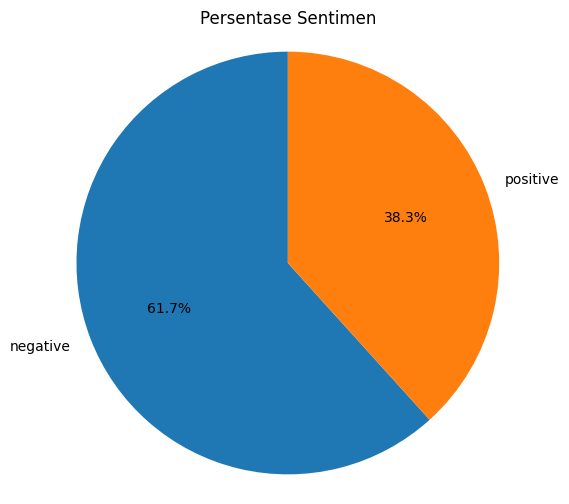

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
plt.pie(clean_df['polarity'].value_counts(), labels=clean_df['polarity'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Persentase Sentimen')
plt.show()

In [58]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(clean_df['text_akhir']))

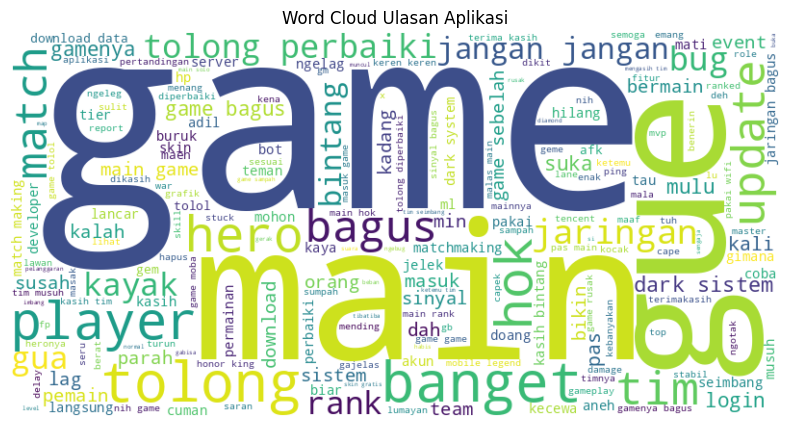

In [59]:
from wordcloud import WordCloud

# Gabungkan seluruh teks jadi satu string
text = " ".join(clean_df['text_akhir'])

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Ulasan Aplikasi")
plt.show()


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7600252604988949
Naive Bayes - accuracy_test: 0.7631828228607515


In [62]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9733185980423114
Random Forest - accuracy_test: 0.8114935269971582


In [63]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9733185980423114
Decision Tree - accuracy_test: 0.7597095042627092


In [64]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.8468582254499526
Logistic Regression - accuracy_test: 0.8323334385854121


Periksa distribusi sentimen dalam data latih dan data uji untuk memastikan keseimbangan.


In [65]:
print('Sentiment distribution in training data:')
print(y_train.value_counts())
print('\nSentiment distribution in testing data:')
print(y_test.value_counts())

Sentiment distribution in training data:
polarity
negative    7831
positive    4837
Name: count, dtype: int64

Sentiment distribution in testing data:
polarity
negative    1939
positive    1228
Name: count, dtype: int64


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Inisialisasi objek TfidfVectorizer dengan parameter yang berbeda
tfidf_new = TfidfVectorizer(max_features=500, min_df=10, max_df=0.9, ngram_range=(1, 2))

# Terapkan fit_transform pada data teks yang sudah dibersihkan
X_tfidf_new = tfidf_new.fit_transform(clean_df['text_akhir'])

# Bagi data yang telah diubah menjadi set pelatihan dan pengujian
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_tfidf_new, clean_df['polarity'], test_size=0.2, random_state=42)

# Display the shapes of the new train and test sets to verify
print("Shape of X_train_new:", X_train_new.shape)
print("Shape of X_test_new:", X_test_new.shape)
print("Shape of y_train_new:", y_train_new.shape)
print("Shape of y_test_new:", y_test_new.shape)

Shape of X_train_new: (12668, 500)
Shape of X_test_new: (3167, 500)
Shape of y_train_new: (12668,)
Shape of y_test_new: (3167,)


## Penyetelan hyperparameter
Optimalkan hyperparameter model yang dipilih untuk meningkatkan kinerja.


In [67]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter frid untuk Logistic Regression
param_grid_lr = {'C': [0.1, 1.0, 10.0]}

# Buat objek GridSearchCV dengan Regresi Logistik, grid parameter, dan 5-fold cross-validation
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5)

# Latih objek GridSearchCV di data baru
grid_search_lr.fit(X_train_new, y_train_new)

print('Parameter terbaik Logistic Regression:', grid_search_lr.best_params_)
print('cross-validation score terbaik untuk Logistic Regression:', grid_search_lr.best_score_)

Parameter terbaik Logistic Regression: {'C': 10.0}
cross-validation score terbaik untuk Logistic Regression: 0.8751178679785163


## Validasi silang

Gunakan validasi silang untuk mendapatkan perkiraan kinerja model yang lebihandal.


In [68]:
from sklearn.model_selection import cross_val_score

# Menggunakan model Logistic Regression terbaik sebelumnya
best_lr_model = grid_search_lr.best_estimator_

# Menghitung cross-validation scores
cv_scores = cross_val_score(best_lr_model, X_train_new, y_train_new, cv=5)

print('rata-rata cross-validation score untuk model Logistic Regression terbaik:', cv_scores.mean())

rata-rata cross-validation score untuk model Logistic Regression terbaik: 0.8751178679785163


## Evaluasi model

Evaluasi kembali model menggunakan metrik yang sesuai dan bandingkan hasilnya.


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

# Gunakan model Regresi Logistik terbaik dari langkah sebelumnya
best_lr_model = grid_search_lr.best_estimator_

# Prediksi sentimen pada data uji baru menggunakan model Regresi Logistik terbaik
y_pred_test_lr_best = best_lr_model.predict(X_test_new)

# Hitung akurasi dari model Regresi Logistik terbaik pada data uji
accuracy_test_lr_best = accuracy_score(y_test_new, y_pred_test_lr_best)

# Cetak nilai akurasi
print('Regresi Logistik Terbaik - akurasi_pengujian:', accuracy_test_lr_best)

# Hasilkan dan cetak laporan klasifikasi
print('\nRegresi Logistik Terbaik - Laporan Klasifikasi:')
print(classification_report(y_test_new, y_pred_test_lr_best))

# Hasilkan dan cetak matriks kebingungan
print('\nRegresi Logistik Terbaik - Matriks Kebingungan:')
print(confusion_matrix(y_test_new, y_pred_test_lr_best))

# Bandingkan hasilnya dengan model sebelumnya (Random Forest, Decision Tree, dan Multinomial Naive Bayes)
print("\nPerbandingan dengan model sebelumnya:")
print(f"Random Forest - akurasi_pengujian: {accuracy_test_rf}")
print(f"Pohon Keputusan - akurasi_pengujian: {accuracy_test_dt}")
print(f"Multinomial Naive Bayes - akurasi_pengujian: {accuracy_test_nb}")
print(f"Regresi Logistik Terbaik - akurasi_pengujian: {accuracy_test_lr_best}")

Regresi Logistik Terbaik - akurasi_pengujian: 0.8680138932743922

Regresi Logistik Terbaik - Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      1939
    positive       0.83      0.83      0.83      1228

    accuracy                           0.87      3167
   macro avg       0.86      0.86      0.86      3167
weighted avg       0.87      0.87      0.87      3167


Regresi Logistik Terbaik - Matriks Kebingungan:
[[1727  212]
 [ 206 1022]]

Perbandingan dengan model sebelumnya:
Random Forest - akurasi_pengujian: 0.8114935269971582
Pohon Keputusan - akurasi_pengujian: 0.7597095042627092
Multinomial Naive Bayes - akurasi_pengujian: 0.7631828228607515
Regresi Logistik Terbaik - akurasi_pengujian: 0.8680138932743922


## Ringkasan Analisis Sentimen Ulasan Aplikasi

Analisis ini bertujuan untuk menentukan sentimen (positif atau negatif) dari ulasan aplikasi yang diambil dari Google Play Store.

**Langkah-langkah yang dilakukan:**

1.  **Pengambilan Data**: Menggunakan `google-play-scraper` untuk mengambil 99,000 ulasan aplikasi dengan `appId` 'com.levelinfinite.sgameGlobal', bahasa dan negara 'id', dan diurutkan berdasarkan 'MOST_RELEVANT'.
2.  **Pembersihan Data**:
    *   Menghapus baris dengan nilai yang hilang (`dropna`).
    *   Menghapus ulasan duplikat (`drop_duplicates`).
3.  **Pra-pemrosesan Teks**: Menerapkan serangkaian fungsi untuk membersihkan dan menyiapkan teks ulasan untuk analisis:
    *   `cleaningText`: Menghapus mention, hashtag, RT, link, angka, dan karakter non-alfanumerik, serta mengganti baris baru dengan spasi dan menghapus tanda baca dan spasi ekstra.
    *   `casefoldingText`: Mengubah semua teks menjadi huruf kecil.
    *   `fix_slangwords`: Mengganti kata-kata slang dengan bentuk standarnya menggunakan kamus yang disediakan.
    *   `tokenizingText`: Memecah teks menjadi kata-kata (token).
    *   `filteringText`: Menghapus kata-kata umum (stopwords) dalam bahasa Indonesia dan Inggris, serta beberapa kata tambahan.
    *   `toSentence`: Menggabungkan token kembali menjadi kalimat.
    Kolom-kolom baru ditambahkan ke DataFrame untuk menyimpan hasil setiap langkah pra-pemrosesan, dengan `text_akhir` berisi teks yang sudah sepenuhnya bersih.
4.  **Analisis Sentimen Berbasis Leksikon**:
    *   Memuat kamus kata-kata positif dan negatif dari file CSV yang di-host di GitHub.
    *   Menerapkan fungsi `sentiment_analysis_lexicon_indonesia` pada kolom `text_stopword` untuk menghitung skor polaritas dan menentukan sentimen (positif atau negatif).
    *   Didapatkan hasil distribusi sentimen awal: 9770 negatif dan 6065 positif.
    *   Visualisasi distribusi sentimen menggunakan pie chart.
5.  **Visualisasi Word Cloud**: Membuat dan menampilkan Word Cloud dari semua kata dalam kolom `text_akhir` untuk melihat kata-kata yang paling sering muncul.
6.  **Analisis Sentimen Berbasis Machine Learning**:
    *   Memisahkan data bersih menjadi fitur (`text_akhir`) dan label (`polarity`).
    *   Menggunakan `TfidfVectorizer` untuk mengekstraksi fitur dari teks, mengubah teks menjadi representasi numerik.
    *   Membagi data menjadi set pelatihan (80%) dan pengujian (20%).
    *   Melatih dan mengevaluasi beberapa model klasifikasi:
        *   **Multinomial Naive Bayes**: Akurasi pengujian: 0.7631
        *   **Random Forest Classifier**: Akurasi pengujian: 0.8114
        *   **Decision Tree Classifier**: Akurasi pengujian: 0.7597
        *   **Logistic Regression**: Akurasi pengujian: 0.8323
7.  **Penyetelan Hyperparameter dan Validasi Silang (menggunakan data baru dengan parameter TF-IDF yang diubah)**:
    *   Menyiapkan data baru dengan `TfidfVectorizer` yang berbeda (`max_features=500`, `min_df=10`, `max_df=0.9`, `ngram_range=(1, 2)`).
    *   Menggunakan `GridSearchCV` untuk menemukan hyperparameter terbaik untuk model Logistic Regression (`C`: [0.1, 1.0, 10.0]) menggunakan 5-fold cross-validation pada data pelatihan baru. Parameter terbaik yang ditemukan adalah `C=10.0` dengan skor cross-validation terbaik 0.8751.
    *   Menggunakan `cross_val_score` untuk memvalidasi model Logistic Regression terbaik dengan 5-fold cross-validation, menghasilkan rata-rata skor cross-validation 0.8751.
8.  **Evaluasi Model Akhir**:
    *   Mengevaluasi model Logistic Regression terbaik pada data uji baru.
    *   Menghasilkan laporan klasifikasi (precision, recall, f1-score) dan confusion matrix.
    *   Akurasi pengujian model Logistic Regression terbaik adalah 0.8680.
    *   Membandingkan akurasi model Logistic Regression terbaik dengan model-model sebelumnya, menunjukkan bahwa Logistic Regression terbaik memberikan akurasi tertinggi pada data uji.

Secara keseluruhan, analisis ini berhasil melakukan pra-pemrosesan teks ulasan, menerapkan analisis sentimen berbasis leksikon, dan membangun serta mengevaluasi beberapa model klasifikasi machine learning untuk sentimen. Model Logistic Regression, setelah penyetelan hyperparameter dan validasi silang, menunjukkan kinerja terbaik dalam memprediksi sentimen ulasan.